<a href="https://colab.research.google.com/github/AkhilVarma753/IIIT_Hyderabad_LabAssessment/blob/main/Module_4_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

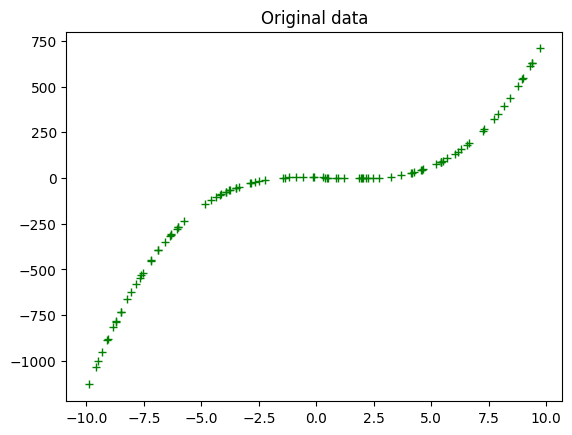

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)


def eval_polynomial(coeffs, x):
    degree = len(coeffs) - 1
    result = sum([coeffs[i] * (x ** (degree - i)) for i in range(degree + 1)])
    return result


def eval_polynomial_jitter(coeffs, x, j):
    y = eval_polynomial(coeffs, x)
    jitter = random.uniform(-j, j)
    return y + jitter


def loss_mse(ys, y_bar):
    squared_diff = [(y - y_hat) ** 2 for y, y_hat in zip(ys, y_bar)]
    return sum(squared_diff) / len(ys)


def calc_gradient_polynomial(coeffs, inputs_x, outputs_y, epsilon=1e-8):
    degree = len(coeffs) - 1
    gradients = []

    y_bars = [eval_polynomial(coeffs, x) for x in inputs_x]
    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
            for i in range(degree + 1):
                partial = -2 * (x ** (degree - i)) * (y - y_bar + epsilon)
                gradients.append(partial)

    n = len(inputs_x)
    updated_coeffs = [coeffs[i] - lr * sum(gradients[i::degree + 1]) / n for i in range(degree + 1)]

    return updated_coeffs


def gradient_descent(epochs, lr, gradient_clip=1e6):
    losses = []
    coeffs_to_test = np.random.uniform(-1, 1, 6)
    for epoch in range(epochs):
        y_bar = [eval_polynomial(coeffs_to_test, x) for x in hundred_xs]
        loss = loss_mse(ys, y_bar)
        gradients = calc_gradient_polynomial(coeffs_to_test, hundred_xs, ys)
        gradients = [np.clip(grad, -gradient_clip, gradient_clip) for grad in gradients]
        coeffs_to_test = [coeffs_to_test[i] - lr * gradients[i] for i in range(len(coeffs_to_test))]
        losses.append(loss)


        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}, Coefficients: {coeffs_to_test}")


        if any(np.isnan(coeffs_to_test)):
            print(f"NaN coefficients encountered at epoch {epoch}")
            break

    return losses, coeffs_to_test, y_bar



hundred_xs = np.random.uniform(-10, 10, 100)
coeffs_cubic = [1, -2, -3, 4]
ys = [eval_polynomial(coeffs_cubic, x) for x in hundred_xs]

plt.plot(hundred_xs, ys, 'g+')
plt.title('Original data')
plt.show()